Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7303
           1       0.51      0.51      0.51       935

    accuracy                           0.89      8238
   macro avg       0.73      0.73      0.73      8238
weighted avg       0.89      0.89      0.89      8238

Confusion Matrix:
[[6846  457]
 [ 454  481]]


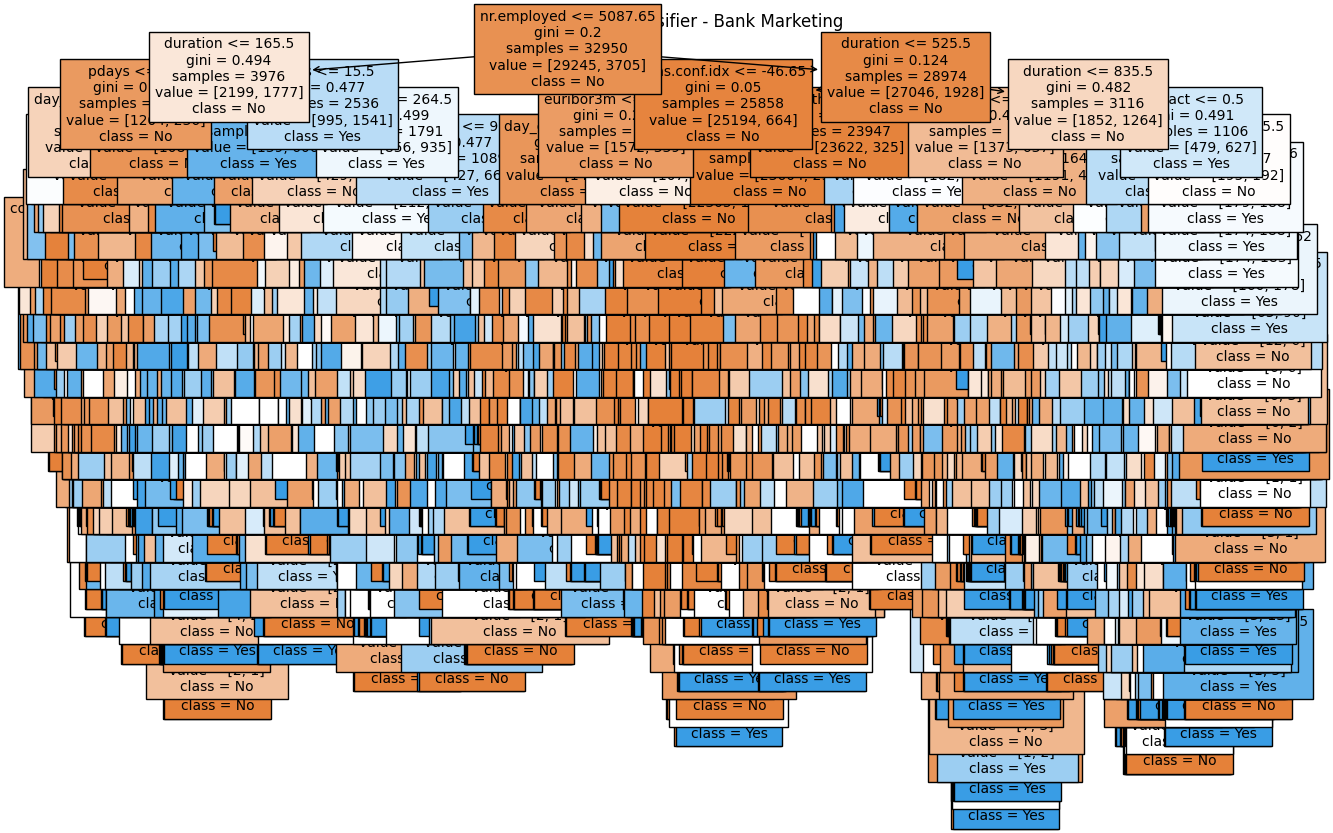

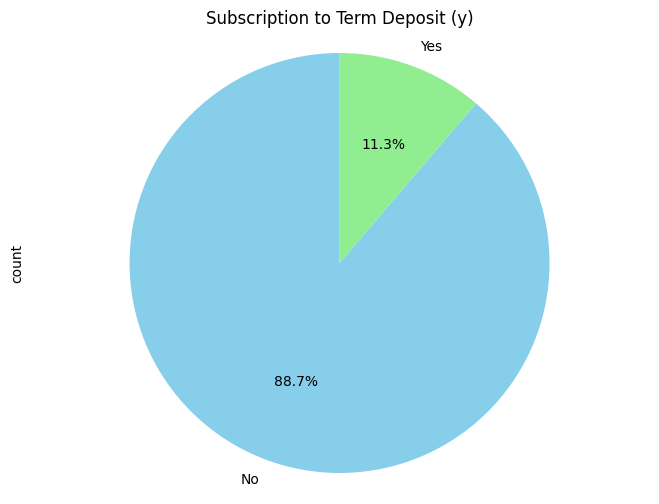

<ipython-input-5-dac764182358>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='job', data=bank_data, palette='viridis')


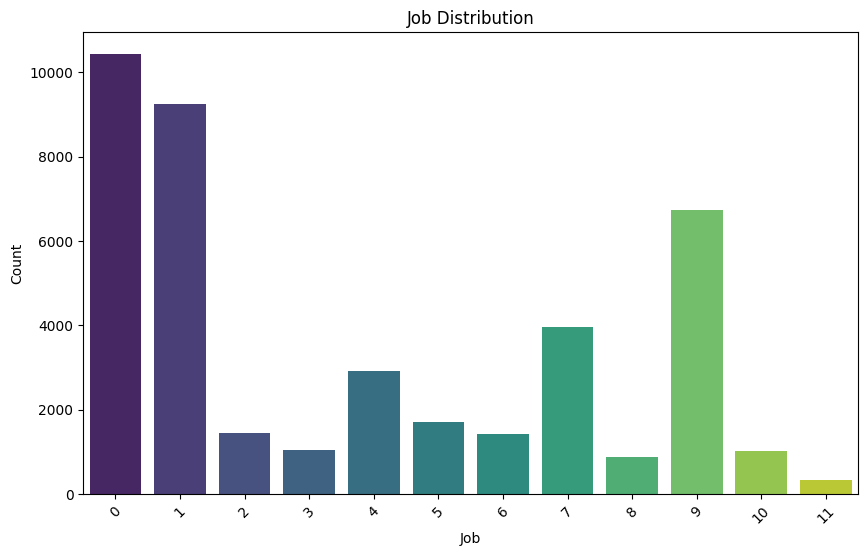


Education Level Distribution:
   Education Level  Count
0                6  12168
1                3   9515
2                2   6045
3                5   5243
4                0   4176
5                1   2292
6                7   1731
7                4     18


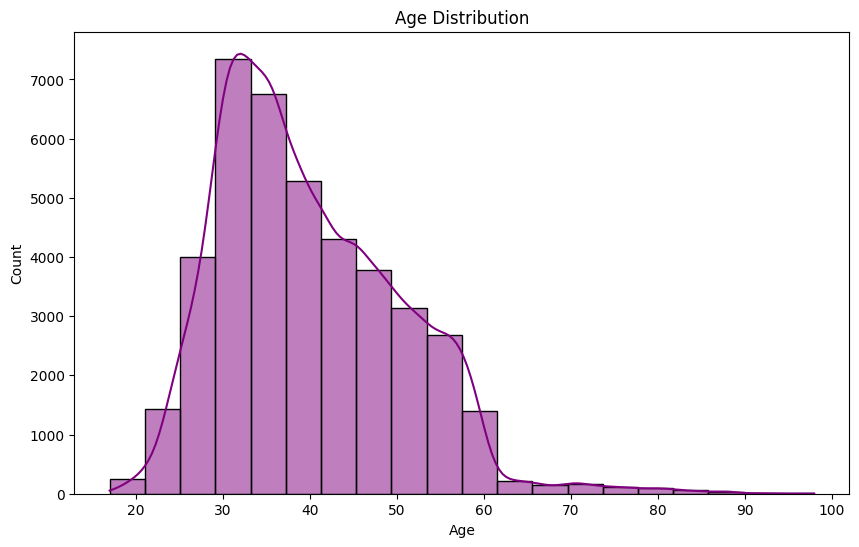

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"
bank_data = pd.read_csv("/content/bank-additional-full.csv", sep=';')
encoder = LabelEncoder()
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
for col in categorical_cols:
    bank_data[col] = encoder.fit_transform(bank_data[col])

X = bank_data.drop('y', axis=1)
y = bank_data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], fontsize=10)
plt.title("Decision Tree Classifier - Bank Marketing")
plt.show()

plt.figure(figsize=(8, 6))
bank_data['y'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['No', 'Yes'], startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Subscription to Term Deposit (y)')
plt.axis('equal')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='job', data=bank_data, palette='viridis')
plt.xticks(rotation=45)
plt.title('Job Distribution')
plt.xlabel('Job')
plt.ylabel('Count')
plt.show()

education_counts = bank_data['education'].value_counts().reset_index()
education_counts.columns = ['Education Level', 'Count']
print("\nEducation Level Distribution:")
print(education_counts)

plt.figure(figsize=(10, 6))
sns.histplot(bank_data['age'], bins=20, kde=True, color='purple')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()